In [4]:
import igraph as ig
import numpy as np
np.random.seed(0)
import random
random.seed(0)
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Scrivi il DataFrame in un file CSV
csv_file_path = 'reddit_comments_violenza_sulle_donne.csv'  # Sostituisci con il percorso di destinazione per il file CSV
df.to_csv(csv_file_path, index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'reddit_comments_violenza_sulle_donne.xlsx'

Nel seguente grafo (relativo al primo post) i nodi sono le persone che hanno commentato sotto al post:

In [73]:
# Leggo il file CSV
file_path = 'reddit_comments_violenza_sulle_donne.csv'
df = pd.read_csv(file_path)

In [74]:
# Filtro i commenti relativi al primo post nel dataframe
post_id = df['Post ID'].iloc[0]
post_comments = df[df['Post ID'] == post_id]

In [75]:
# Rimuovo i prefissi dagli ID dei commenti genitori
post_comments['Parent Comment ID'] = post_comments['Parent Comment ID'].str.replace(r'^t\d_', '', regex=True)

C:\Users\franc\AppData\Local\Temp\ipykernel_21780\3672071226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_comments['Parent Comment ID'] = post_comments['Parent Comment ID'].str.replace(r'^t\d_', '', regex=True)


In [76]:
post_comments

Comment ID                                       Comment Body  Post ID   
0        kpex6b9  Ore 01:28, 4870 commenti!\n\n**Risultati della...  1alb5bj  \
1        kpdh35b  Tg1 surreale\n\nSanremo \n\nMa ora andiamo a G...  1alb5bj   
2        kpeyux8  “Abbiamo fatto una delle gag più terrificanti ...  1alb5bj   
3        kpdzmo4  Io sto cercando di uscire da una leucemia, ved...  1alb5bj   
4        kpe03xm                               Forza e coraggio! 💪🏼  1alb5bj   
...          ...                                                ...      ...   
14525    kpexnn7                               Always has been 👩‍🚀🔫  1alb5bj   
14526    kpdij31  non è possibile sopravvivere ad un tale ammont...  1alb5bj   
14527    kpduono             Mettete dei flowers nei vostri cannons  1alb5bj   
14528    kpdutqb  Semplicemente ha chiesto un cessate il fuoco, ...  1alb5bj   
14529    kpe6x2b                                             Fregne  1alb5bj   

                                              Post Title  Number of Replies   
0      [Megathread] 74° Festival di Sanremo (Seconda ...                  0  \
1      [Megathread] 74° Festival di Sanremo (Seconda ...                  0   
2      [Megathread] 74° Festival di Sanremo (Seconda ...                  0   
3      [Megathread] 74° Festival di Sanremo (Seconda ...                  1   
4      [Megathread] 74° Festival di Sanremo (Seconda ...                  0   
...                                                  ...                ...   
14525  [Megathread] 74° Festival di Sanremo (Seconda ...                  0   
14526  [Megathread] 74° Festival di Sanremo (Seconda ...                  0   
14527  [Megathread] 74° Festival di Sanremo (Seconda ...                  0   
14528  [Megathread] 74° Festival di Sanremo (Seconda ...                  0   
14529  [Megathread] 74° Festival di Sanremo (Seconda ...                  0   

                                                Post URL Subreddit   
0      https://www.reddit.com/r/italy/comments/1alb5b...     italy  \
1      https://www.reddit.com/r/italy/comments/1alb5b...     italy   
2      https://www.reddit.com/r/italy/comments/1alb5b...     italy   
3      https://www.reddit.com/r/italy/comments/1alb5b...     italy   
4      https://www.reddit.com/r/italy/comments/1alb5b...     italy   
...                                                  ...       ...   
14525  https://www.reddit.com/r/italy/comments/1alb5b...     italy   
14526  https://www.reddit.com/r/italy/comments/1alb5b...     italy   
14527  https://www.reddit.com/r/italy/comments/1alb5b...     italy   
14528  https://www.reddit.com/r/italy/comments/1alb5b...     italy   
14529  https://www.reddit.com/r/italy/comments/1alb5b...     italy   

       Comment Score Parent Comment ID  Created (UTC)      Comment Author   
0                  1               NaN     1707352093          Lord_TheJc  \
1                 63               NaN     1707334033      step_function_   
2                 65               NaN     1707352742          yellowsjam   
3                 56               NaN     1707340192  Belsnickel_Cosplay   
4                 10           kpdzmo4     1707340352            vydarr23   
...              ...               ...            ...                 ...   
14525              5           kpex9uk     1707352281            ristoman   
14526              9           kpdi7cy     1707334519          DarknerHUE   
14527              9           kpduj12     1707338542  PM_ME_EUW_RP_CODES   
14528              9           kpduj12     1707338590  Belsnickel_Cosplay   
14529              6           kpe6ozy     1707342614      Ludo_Lawliet02   

      Parent Comment Author  
0                   deleted  
1                   deleted  
2                   deleted  
3                   deleted  
4        Belsnickel_Cosplay  
...                     ...  
14525             phlaveeoh  
14526  Inner-Championship40  
14527           Fomentatore  
14528           Fomentatore  


In [77]:
# Mi assicuro che i dati siano del tipo corretto (stringhe per ID)
post_comments['Comment ID'] = post_comments['Comment ID'].astype(str)
post_comments['Parent Comment ID'] = post_comments['Parent Comment ID'].astype(str)

C:\Users\franc\AppData\Local\Temp\ipykernel_21780\3760340397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_comments['Comment ID'] = post_comments['Comment ID'].astype(str)
C:\Users\franc\AppData\Local\Temp\ipykernel_21780\3760340397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_comments['Parent Comment ID'] = post_comments['Parent Comment ID'].astype(str)


In [78]:
# Creazione dei nodi (autori dei commenti)
comment_authors = post_comments['Comment Author'].unique()

In [79]:
# Creo un grafo vuoto
g = ig.Graph(directed=True)

# Aggiungo i nodi al grafo (gli autori dei commenti)
g.add_vertices(comment_authors)

In [80]:
# Lista per gli archi (con sorgente, destinazione e peso)
edges = []

In [109]:
for _, comment in post_comments.iterrows():
    #print(_)
    print(comment)

Comment ID                                                         kpex6b9
Comment Body             Ore 01:28, 4870 commenti!\n\n**Risultati della...
Post ID                                                            1alb5bj
Post Title               [Megathread] 74° Festival di Sanremo (Seconda ...
Number of Replies                                                        0
Post URL                 https://www.reddit.com/r/italy/comments/1alb5b...
Subreddit                                                            italy
Comment Score                                                            1
Parent Comment ID                                                      nan
Created (UTC)                                                   1707352093
Comment Author                                                  Lord_TheJc
Parent Comment Author                                              deleted
Name: 0, dtype: object
Comment ID                                                         kpdh35b
Co

In [81]:
for _, comment in post_comments.iterrows():
    if pd.notna(comment['Parent Comment ID']) and comment['Parent Comment ID'] in post_comments['Comment ID'].values:
        source = comment['Parent Comment Author']
        target = comment['Comment Author']
        weight = comment['Comment Score']  # Usa lo score del commento come peso dell'arco
        edges.append((source, target, weight))

In [82]:
edges

[('Belsnickel_Cosplay', 'vydarr23', 10),
 ('Funky_Chocolate', 'nerdvana89', 37),
 ('Funky_Chocolate', 'Exxon_Valdes_1', 12),
 ('Ago_1702', 'rici_g', 11),
 ('Professional-Bird88', 'Exxon_Valdes_1', 10),
 ('Kay19526', 'ristoman', 11),
 ('ShitlifeFTW', 'nunziantimo', 12),
 ('Mirnlonh', 'giYRW18voCJ0dYPfz21V', 18),
 ('g_astone', 'ristoman', 10),
 ('gIOonNii', '0ne_Nerd', 10),
 ('StayM', 'Altruistic-Chapter2', 14),
 ('Lavrain', 'Lampadagialla', 12),
 ('Elios4Freedom', 'Kay19526', 16),
 ('False_Bug1396', 'PM_ME_EUW_RP_CODES', 8),
 ('fralbalbero', 'jesuspiero', 11),
 ('AveAlino', 'yellowsjam', 9),
 ('DevastatorTNT', 'Socc-mel_', 13),
 ('matte_pan', 'roblovelost', 8),
 ('burningsssky', 'dom_o_dossola', 9),
 ('bubblegummeru', 'NicolBolasUBBBR', 11),
 ('xJaxar', 'Sauronxx', 8),
 ('Jeerva', 'AndreaPafgua', 7),
 ('Shin88ryu', 'jey_jey_6', 8),
 ('fagottolo', 'Sauronxx', 7),
 ('Don_naiolo', 'Belsnickel_Cosplay', 11),
 ('Redditor_From_Italy', 'NicolBolasUBBBR', 6),
 ('aragost', 'ristoman', 6),
 ('Pla

In [83]:
# Aggiungi gli archi al grafo con peso
g.add_edges([(source, target) for source, target, _ in edges])

# Aggiungi i pesi agli archi
g.es['weight'] = [weight for _, _, weight in edges]

In [87]:
# Stampo il sommario del grafo
g.summary()
print(g)

IGRAPH DNW- 236 132 --
+ attr: name (v), weight (e)
+ edges (vertex names):
Belsnickel_Cosplay->vydarr23, Funky_Chocolate->nerdvana89,
Funky_Chocolate->Exxon_Valdes_1, Ago_1702->rici_g,
Professional-Bird88->Exxon_Valdes_1, Kay19526->ristoman,
ShitlifeFTW->nunziantimo, Mirnlonh->giYRW18voCJ0dYPfz21V, g_astone->ristoman,
gIOonNii->0ne_Nerd, StayM->Altruistic-Chapter2, Lavrain->Lampadagialla,
Elios4Freedom->Kay19526, False_Bug1396->PM_ME_EUW_RP_CODES,
fralbalbero->jesuspiero, AveAlino->yellowsjam, DevastatorTNT->Socc-mel_,
matte_pan->roblovelost, burningsssky->dom_o_dossola,
bubblegummeru->NicolBolasUBBBR, xJaxar->Sauronxx, Jeerva->AndreaPafgua,
Shin88ryu->jey_jey_6, fagottolo->Sauronxx, Don_naiolo->Belsnickel_Cosplay,
Redditor_From_Italy->NicolBolasUBBBR, aragost->ristoman,
PlasticComb->Altruistic-Chapter2, phlaveeoh->ristoman,
Inner-Championship40->DarknerHUE, Fomentatore->PM_ME_EUW_RP_CODES,
Fomentatore->Belsnickel_Cosplay, Redditor_From_Italy->Ludo_Lawliet02,
Belsnickel_Cosplay->vydar

In [93]:
# Visualizzazione del grafo con frecce e spessore degli archi basato sul peso
def plot_graph(g):
    
    ig.plot(
        g,
        layout=layout,  
        vertex_size=20, 
        edge_arrow_size=0.5,    
        edge_width=[0.5 + 2 * weight / max(g.es['weight']) for weight in g.es['weight']],  # Spessore degli archi basato sul peso
        margin=50,
        vertex_label_dist= 2,
        bbox=(800, 800),
    )

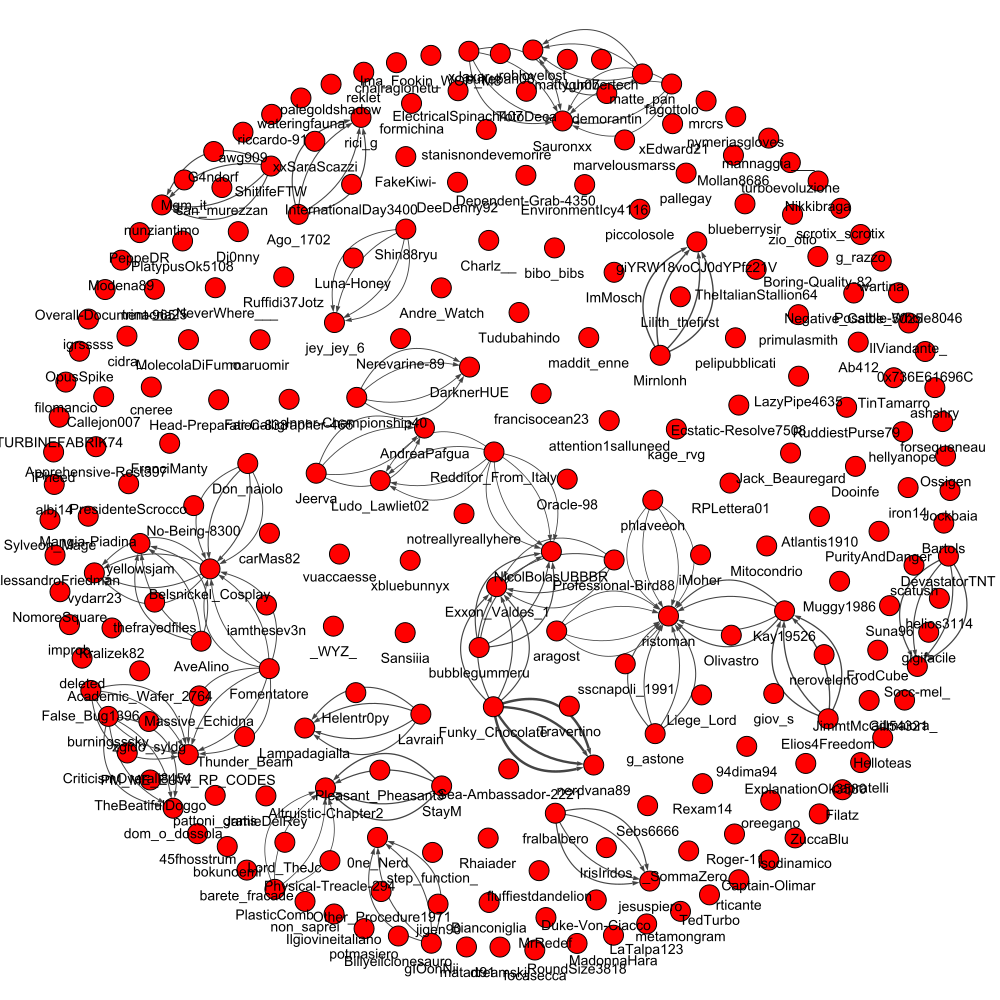

In [115]:
# Visualizza il grafo
layout = g.layout("kk")
ig.plot(
        g,
        layout=layout, 
        vertex_label=g.vs["name"], 
        vertex_size=20, 
        edge_arrow_size=0.5,    
        edge_width=[0.5 + 2 * weight / max(g.es['weight']) for weight in g.es['weight']],  # Spessore degli archi basato sul peso
        margin=50,
        vertex_label_dist= 2,
        bbox=(1000, 1000),
    )

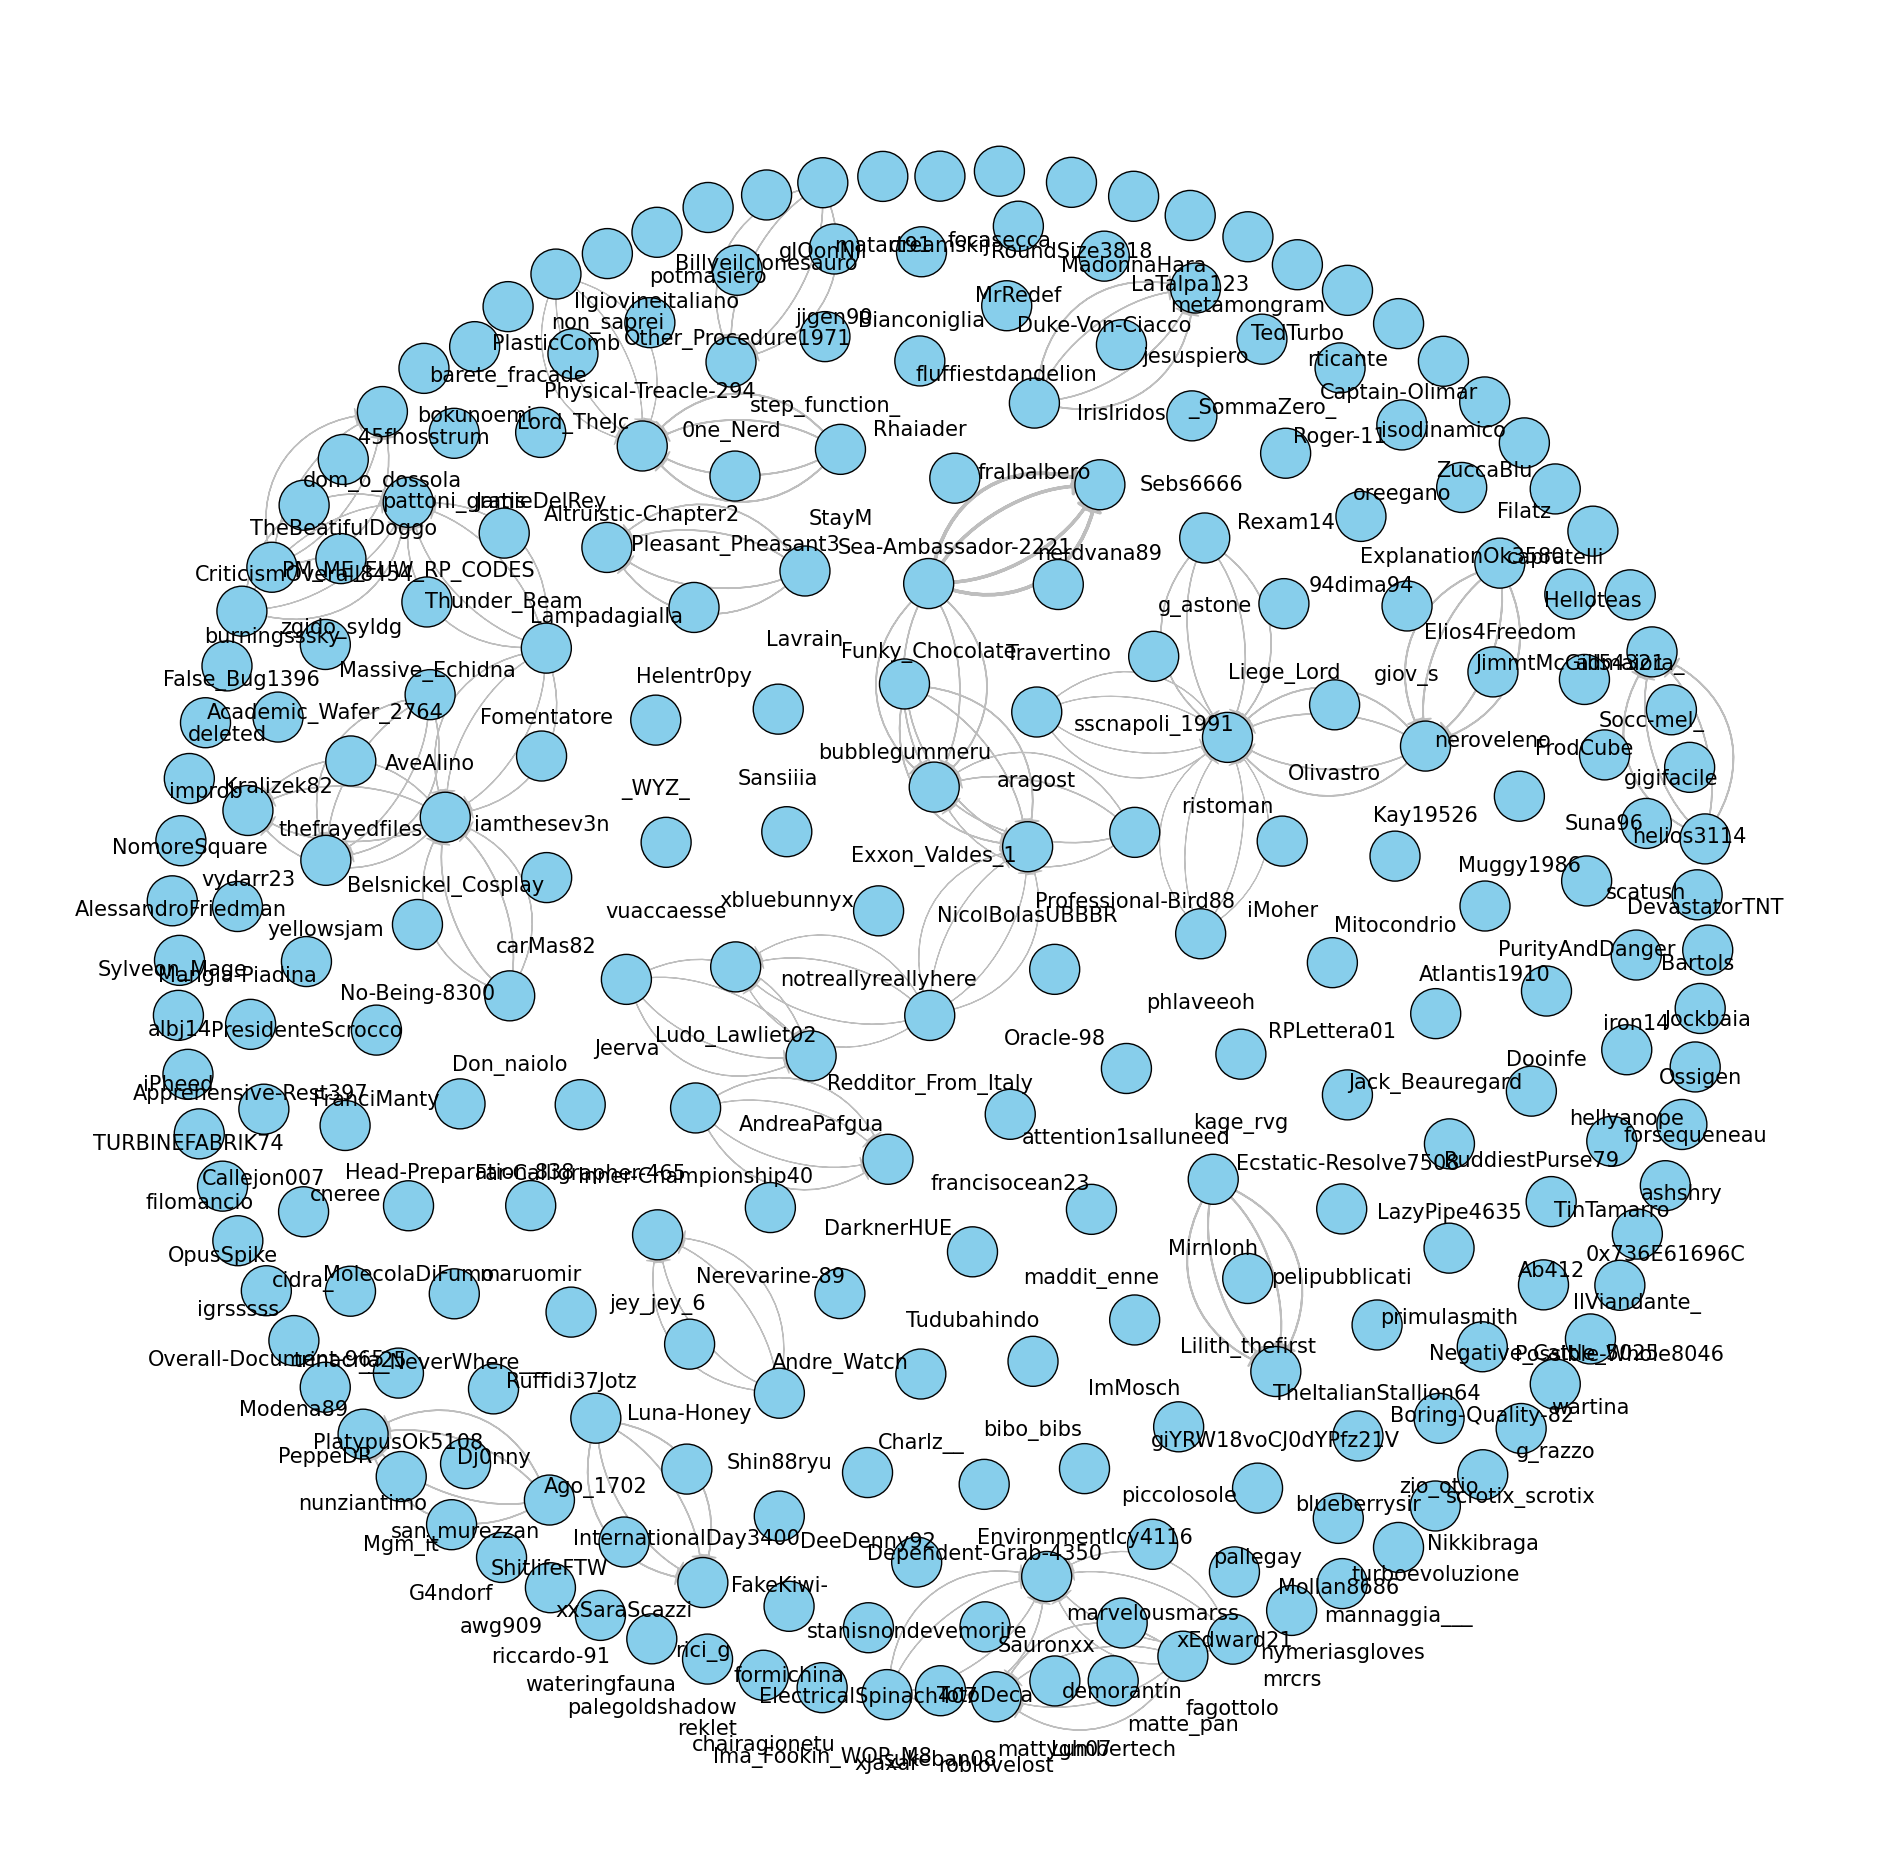

In [128]:
import matplotlib.pyplot as plt
import igraph as ig

# Funzione per visualizzare il grafo
def plot_graph(g):
    # Utilizza il layout Kamada-Kawai
    layout = g.layout_kamada_kawai()
    
    fig, ax = plt.subplots(figsize=(24, 24))  # Aumenta la dimensione della figura

    # Configurazione dello stile di visualizzazione
    visual_style = {
        "layout": layout,
        "vertex_label": g.vs["name"],
        "vertex_size": 50,  # Aumenta la dimensione dei nodi
        "vertex_color": "skyblue",
        "vertex_label_size": 15,  # Aumenta la dimensione delle etichette dei nodi
        "edge_color": "gray",
        "edge_arrow_size": 2,  # Aumenta la dimensione delle frecce degli archi
        "edge_width": [0.5 + 2 * weight / max(g.es['weight']) for weight in g.es['weight']],  # Spessore degli archi basato sul peso
        "margin": 100,
        "vertex_label_dist": 2,
        "bbox": (1200, 1200),  # Dimensione dell'area di disegno
        "target": ax,
    }

    ig.plot(g, **visual_style)
    plt.show()

# Visualizza il grafo
plot_graph(g)


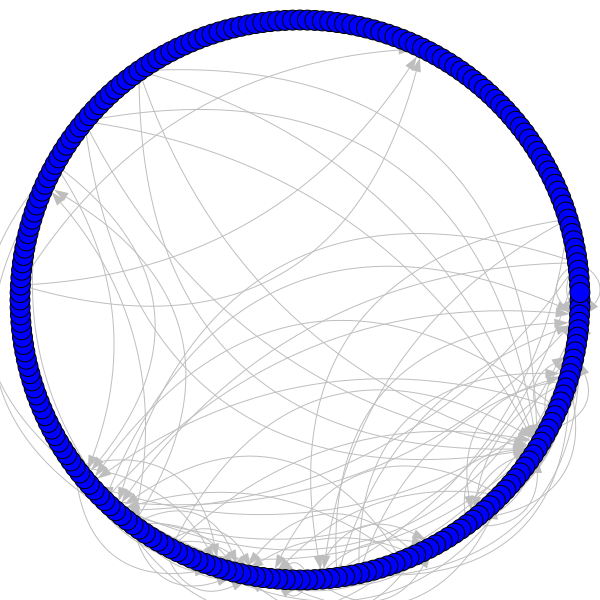

In [129]:
#coming back to the Zachary karate club network
g['layout'] = g.layout_circle()
#G['layout'] = G.layout_random()
#G['layout'] = G.layout_mds()
g.vs['color'] = 'blue'
g.es['color'] = 'gray'
ig.plot(g)

In [116]:
# Verifica degli archi
print(f"Number of edges: {g.ecount()}")
print("Edges:")
for edge in g.es[:10]:  # Itera sui primi 10 archi
    print(edge.tuple)

Number of edges: 132
Edges:
(3, 4)
(5, 6)
(5, 7)
(12, 13)
(18, 7)
(20, 21)
(22, 23)
(11, 34)
(35, 21)
(47, 48)


In [130]:
g.vs.attribute_names()

['name', 'color']

# inizio qui

In [2]:
import pandas as pd

In [4]:
comments_df = pd.read_csv('reddit_comments_violenza_sulle_donne.csv')

In [5]:
comments_df.head()

Comment ID                                       Comment Body  Post ID   
0    kpex6b9  Ore 01:28, 4870 commenti!\n\n**Risultati della...  1alb5bj  \
1    kpdh35b  Tg1 surreale\n\nSanremo \n\nMa ora andiamo a G...  1alb5bj   
2    kpeyux8  “Abbiamo fatto una delle gag più terrificanti ...  1alb5bj   
3    kpdzmo4  Io sto cercando di uscire da una leucemia, ved...  1alb5bj   
4    kpe03xm                               Forza e coraggio! 💪🏼  1alb5bj   

                                          Post Title  Number of Replies   
0  [Megathread] 74° Festival di Sanremo (Seconda ...                  0  \
1  [Megathread] 74° Festival di Sanremo (Seconda ...                  0   
2  [Megathread] 74° Festival di Sanremo (Seconda ...                  0   
3  [Megathread] 74° Festival di Sanremo (Seconda ...                  1   
4  [Megathread] 74° Festival di Sanremo (Seconda ...                  0   

                                            Post URL Subreddit  Comment Score   
0  https://www.reddit.com/r/italy/comments/1alb5b...     italy              1  \
1  https://www.reddit.com/r/italy/comments/1alb5b...     italy             63   
2  https://www.reddit.com/r/italy/comments/1alb5b...     italy             65   
3  https://www.reddit.com/r/italy/comments/1alb5b...     italy             56   
4  https://www.reddit.com/r/italy/comments/1alb5b...     italy             10   

  Parent Comment ID  Created (UTC)      Comment Author Parent Comment Author  
0               NaN     1707352093          Lord_TheJc               deleted  
1               NaN     1707334033      step_function_               deleted  
2               NaN     1707352742          yellowsjam               deleted  
3               NaN     1707340192  Belsnickel_Cosplay               deleted  
4        t1_kpdzmo4     1707340352            vydarr23    Belsnickel_Cosplay